## Analysis and prediction from international football matches

In [78]:
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
results = pd.read_csv('archive/results.csv')
shootouts = pd.read_csv('archive/shootouts.csv')

In [82]:
results.head()

,date,home_team,away_team,home_score,away_score,winners,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Draw,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,England,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Scotland,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Draw,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Scotland,Friendly,Glasgow,Scotland,False


In [9]:
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia


In [44]:
results.describe()

,home_score,away_score
count,43752.000000,43752.000000
mean,1.740126,1.180129
std,1.749672,1.397021
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [37]:
shootouts.describe()

,date,home_team,away_team,winner
count,495,495,495,495
unique,447,140,147,139
top,2021-07-06,South Africa,Uganda,Egypt
freq,4,15,15,13


In [35]:
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [34]:
shootouts.isna().sum()

date         0
home_team    0
away_team    0
winner       0
dtype: int64

In [80]:
results['winners'] = np.select([results['home_score'] > results['away_score'] , 
                                results['away_score'] > results['home_score']], [results['home_team'], results['away_team']], 
                                default='Draw')

In [83]:
results.head()

,date,home_team,away_team,home_score,away_score,winners,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Draw,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,England,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Scotland,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Draw,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Scotland,Friendly,Glasgow,Scotland,False


### Highest number of wins - Overall

Text(0.5, 1.0, 'Winners by count')

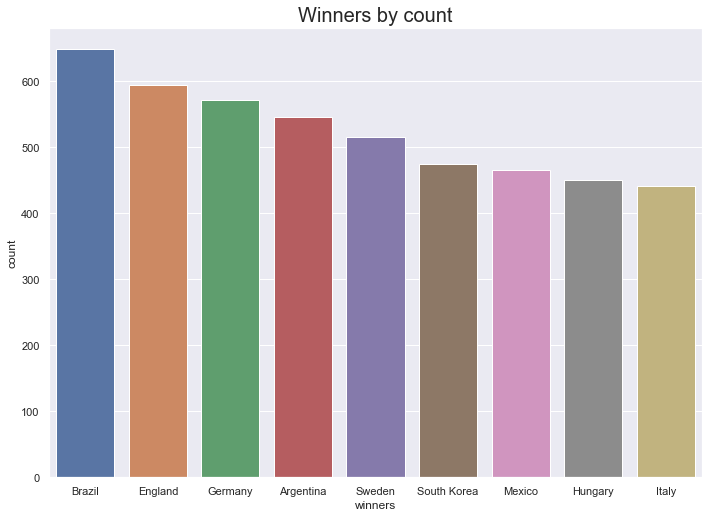

In [103]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=results['winners'], order=results.winners.value_counts().iloc[1:10].index).set_title("Winners by count", fontsize=20)

### Highest number of wins - 1800s

In [107]:
results1800s = results[results['date'] <= '1900-01-01']

Text(0.5, 1.0, 'Winners by count')

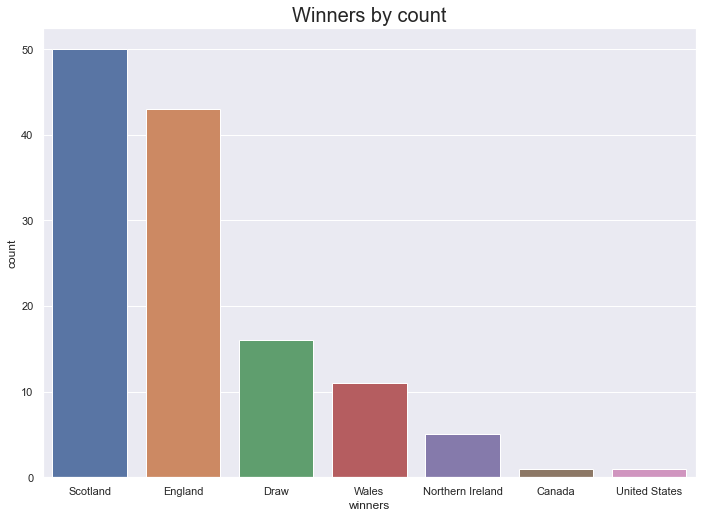

In [108]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=results1800s['winners'],
                order=results1800s.winners.value_counts().iloc[:10].index).set_title("Winners by count", fontsize=20)

### Highest number of wins - 1900 - 1950

In [111]:
results1900s = results[results['date'].between('1900-01-01', '1950-12-31', inclusive='both')]

Text(0.5, 1.0, 'Winners by count')

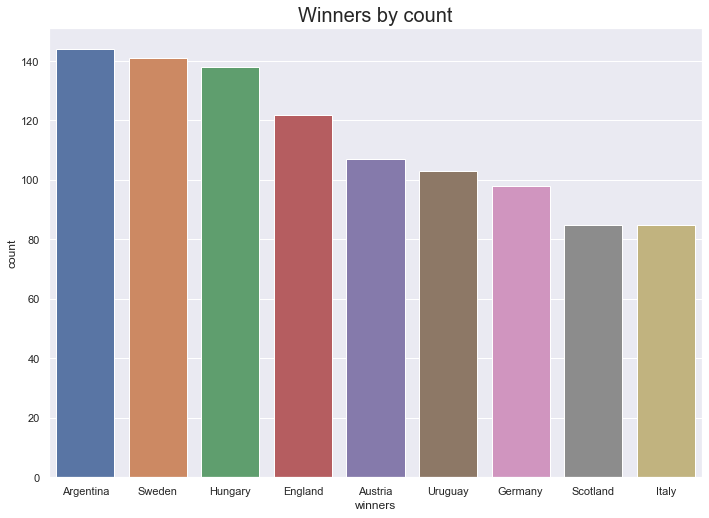

In [113]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=results1900s['winners'],
                order=results1900s.winners.value_counts().iloc[1:10].index).set_title("Winners by count", fontsize=20)

### Highest number of wins - 1950 - 2000

In [116]:
results1950s = results[results['date'].between('1950-01-01', '1999-12-31', inclusive='both')]

Text(0.5, 1.0, 'Winners by count')

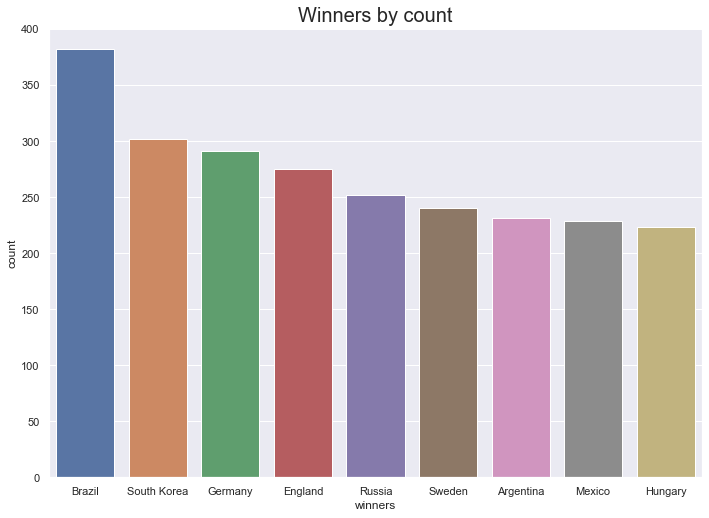

In [117]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=results1950s['winners'],
                order=results1950s.winners.value_counts().iloc[1:10].index).set_title("Winners by count", fontsize=20)

### Highest number of wins after 2000

In [118]:
results2000s = results[results['date'].between('200-01-01', '2000-12-31', inclusive='both')]

Text(0.5, 1.0, 'Winners by count')

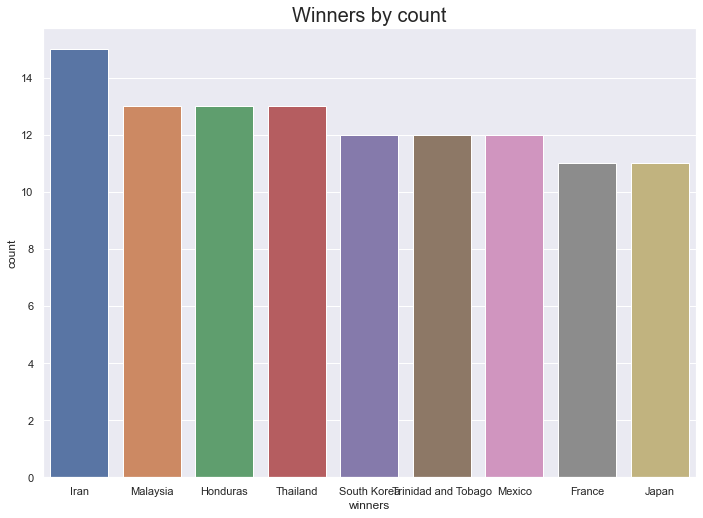

In [119]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=results2000s['winners'],
                order=results2000s.winners.value_counts().iloc[1:10].index).set_title("Winners by count", fontsize=20)

### World cup dominations

In [120]:
resultsworldcup = results[results['tournament'] == 'FIFA World Cup']

Text(0.5, 1.0, 'Winners by count')

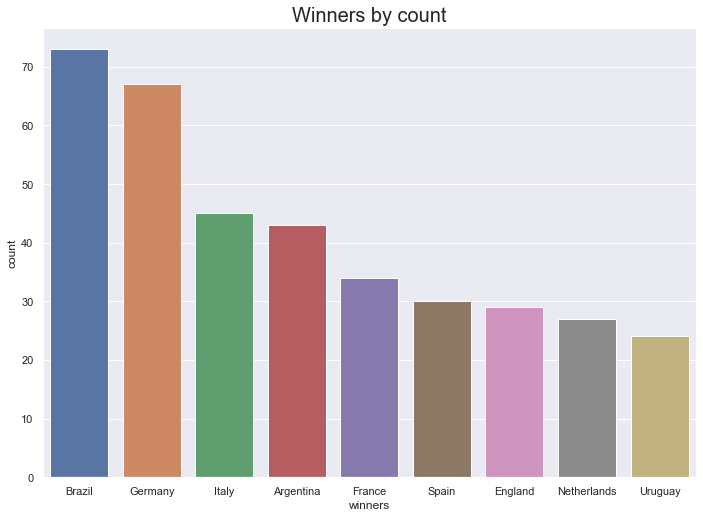

In [122]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=resultsworldcup['winners'],
                order=resultsworldcup.winners.value_counts().iloc[1:10].index).set_title("Winners by count", fontsize=20)